# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import library dasar untuk manipulasi data dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Ganti path dengan lokasi file kamu di Drive
path = '/content/drive/MyDrive/e-commerce-dataset/hasil_clustering_ecommerce.csv'
clustered_data = pd.read_csv(path)

# Cek beberapa baris pertama
clustered_data.head()


,Country,Recency,Frequency,TotalQuantity,AvgUnitPrice,Monetary,Country_Encoded,Cluster
0,Australia,1611.935152,104560.270610,4822,2.454597,5.528612e+09,0,0
1,Austria,256.191218,41609.645640,3503,2.081988,3.129567e+09,1,0
2,Bahrain,19817.639400,5291.977389,94,3.077273,1.348486e+08,2,2
3,Belgium,159.352366,225619.164783,17626,2.060191,1.467106e+10,3,0
4,Brazil,23206.999233,2870.799505,300,2.360526,3.745416e+08,4,2


In [4]:
# Cek info dataset
clustered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          37 non-null     object 
 1   Recency          37 non-null     float64
 2   Frequency        37 non-null     float64
 3   TotalQuantity    37 non-null     int64  
 4   AvgUnitPrice     37 non-null     float64
 5   Monetary         37 non-null     float64
 6   Country_Encoded  37 non-null     int64  
 7   Cluster          37 non-null     int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 2.4+ KB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
# Cek jumlah sampel di setiap cluster
print(clustered_data['Cluster'].value_counts())

Cluster
0    31
2     5
1     1
Name: count, dtype: int64


In [6]:
# Hapus cluster yang jumlahnya terlalu sedikit (misalnya hanya 1 sampel)
min_samples = 2  # Atur batas minimum
valid_clusters = clustered_data['Cluster'].value_counts()
valid_clusters = valid_clusters[valid_clusters >= min_samples].index

# Filter dataset hanya untuk cluster yang cukup banyak
clustered_data_filtered = clustered_data[clustered_data['Cluster'].isin(valid_clusters)]

In [7]:
# Drop kolom 'Country' karena sudah ada 'Country_Encoded'
X = clustered_data.drop(['Cluster', 'Country'], axis=1)
y = clustered_data['Cluster']

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data tanpa stratifikasi (karena sebelumnya ada error)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Konfirmasi pembagian data
print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji  :", X_test.shape[0])

Jumlah data latih: 29
Jumlah data uji  : 8


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [8]:
# Inisialisasi model
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Latih model dan simpan hasilnya
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f'{name} selesai dilatih!')

Random Forest selesai dilatih!
KNN selesai dilatih!
Decision Tree selesai dilatih!
Logistic Regression selesai dilatih!


Penjelasan:

Random Forest: Menggabungkan banyak decision tree untuk hasil yang stabil.

KNN: Mengklasifikasikan berdasarkan mayoritas tetangga terdekat.

Decision Tree: Membuat pohon keputusan berdasarkan fitur dataset.

Logistic Regression: Cocok untuk data dengan hubungan linear antar fitur.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

 Random Forest - Akurasi: 0.88, F1-Score: 0.82


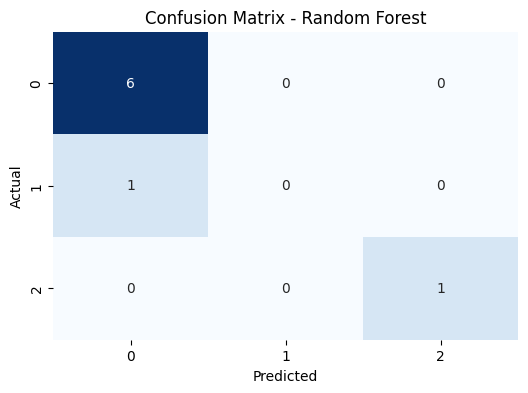

 KNN - Akurasi: 0.75, F1-Score: 0.64


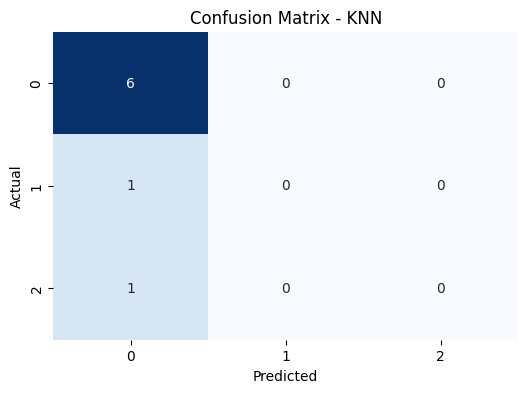

 Decision Tree - Akurasi: 0.88, F1-Score: 0.82


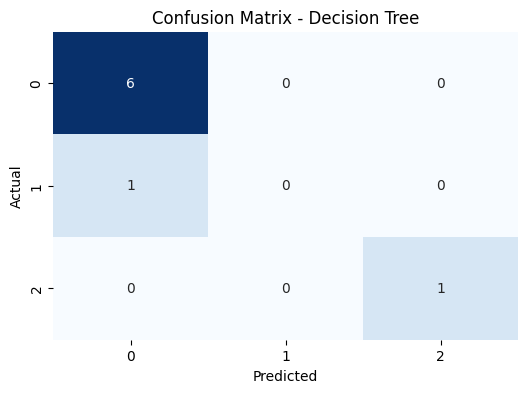

 Logistic Regression - Akurasi: 0.75, F1-Score: 0.64


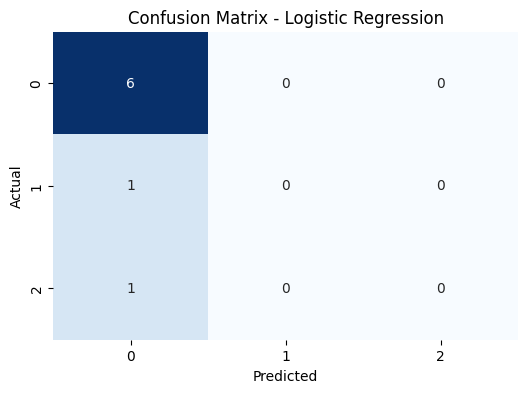

In [9]:
# Evaluasi semua model
for name, model in trained_models.items():
    # Prediksi
    y_pred = model.predict(X_test)

    # Evaluasi metrik
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f' {name} - Akurasi: {accuracy:.2f}, F1-Score: {f1:.2f}')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Pada tahap ini, empat algoritma telah digunakan untuk memprediksi hasil clustering, yaitu: Random Forest, K-Nearest Neighbors (KNN), Decision Tree, dan Logistic Regression. Evaluasi dilakukan menggunakan dua metrik utama:

Akurasi: Mengukur seberapa sering model membuat prediksi yang benar.
F1-Score: Rata-rata harmonis antara Precision dan Recall, cocok untuk dataset yang mungkin tidak seimbang.
Berikut adalah hasil evaluasi masing-masing algoritma:

Algoritma	Akurasi	F1-Score:
 - Random Forest	0.88 | 0.82

 - K-Nearest Neighbors (KNN)	0.75 | 0.64

 - Decision Tree	0.88 | 0.82

 - Logistic Regression	0.75 |	0.64

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [10]:
# Import library untuk tuning
from sklearn.model_selection import GridSearchCV

# Definisikan hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Lakukan Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Tampilkan hyperparameter terbaik
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


Fitting 5 folds for each of 108 candidates, totalling 540 fits

- 5 folds artinya proses cross-validation membagi data menjadi 5 bagian, dan model dilatih sebanyak 5 kali dengan kombinasi data latih dan uji yang berbeda.

- 108 candidates artinya ada 108 kombinasi hyperparameter yang dicoba.

- 540 fits artinya model dilatih sebanyak 540 kali untuk menguji semua kombinasi di setiap fold.

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

🔧 Model Terbaik - Akurasi: 0.88, F1-Score: 0.82


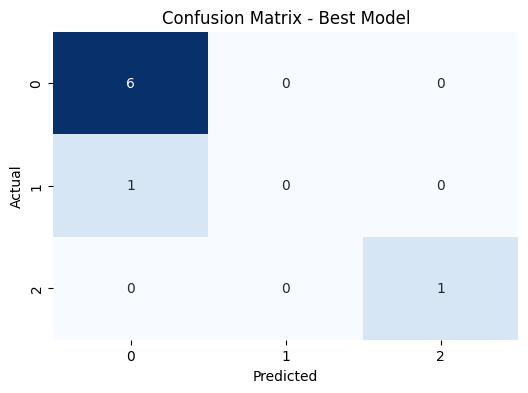

In [11]:
# Prediksi dengan model terbaik
y_pred_best = best_model.predict(X_test)

# Evaluasi metrik
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print(f'🔧 Model Terbaik - Akurasi: {accuracy_best:.2f}, F1-Score: {f1_best:.2f}')

# Confusion Matrix
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix - Best Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
# Dictionary untuk menyimpan hasil evaluasi
evaluation_results = {}

# Evaluasi semua model
for name, model in trained_models.items():
    # Prediksi
    y_pred = model.predict(X_test)

    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Simpan hasil evaluasi di dictionary
    evaluation_results[name] = {'accuracy': accuracy, 'f1_score': f1}

    print(f' {name} - Akurasi: {accuracy:.2f}, F1-Score: {f1:.2f}')

# Cari model terbaik berdasarkan F1-Score (bisa ganti dengan 'accuracy' kalau mau)
best_algorithm = max(evaluation_results, key=lambda x: evaluation_results[x]['f1_score'])

print(f'\n Model Terbaik: {best_algorithm}')


 Random Forest - Akurasi: 0.88, F1-Score: 0.82
 KNN - Akurasi: 0.75, F1-Score: 0.64
 Decision Tree - Akurasi: 0.88, F1-Score: 0.82
 Logistic Regression - Akurasi: 0.75, F1-Score: 0.64

 Model Terbaik: Random Forest


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

<h1>Rekomendasi Tahapan Evaluasi Model</h1>

<h2>1. Perbandingan Sebelum dan Sesudah Tuning</h2>
<p><strong>Sebelum tuning:</strong></p>
<ul>
  <li>Random Forest dan Decision Tree memberikan akurasi <strong>0.88</strong> dan F1-Score <strong>0.82</strong>.</li>
  <li>KNN dan Logistic Regression memberikan akurasi lebih rendah, yaitu <strong>0.75</strong> dengan F1-Score <strong>0.64</strong>.</li>
</ul>

<p><strong>Setelah tuning:</strong></p>
<ul>
  <li>Random Forest tetap mempertahankan akurasi <strong>0.88</strong> dan F1-Score <strong>0.82</strong> setelah tuning.</li>
  <li>Hyperparameter terbaik untuk Random Forest ditemukan dengan:</li>
  <pre>{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}</pre>
  <li>Tuning hyperparameter tidak memberikan peningkatan yang signifikan, menandakan bahwa model sudah cukup optimal bahkan sebelum tuning.</li>
</ul>
<p><strong>Kesimpulan:</strong> Tuning hyperparameter tidak memberikan peningkatan signifikan, tetapi memastikan bahwa model Random Forest sudah bekerja optimal dengan pengaturan default.</p>

<h2>2. Identifikasi Kelemahan Model</h2>
<h3>a. Precision atau Recall Rendah untuk Kelas Tertentu</h3>
<ul>
  <li>Perlu analisis lebih dalam pada Confusion Matrix untuk melihat apakah ada kelas tertentu yang sering salah diklasifikasikan.</li>
  <li>Adanya peringatan:</li>
  <pre>UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.</pre>
  <li>Ini menunjukkan bahwa salah satu kelas hanya memiliki 4 sampel, yang membuat model sulit mempelajari pola dengan baik pada kelas tersebut.</li>
</ul>

<h3>b. Potensi Overfitting atau Underfitting</h3>
<ul>
  <li>Random Forest dan Decision Tree memiliki akurasi tinggi di data uji (0.88), yang bisa menandakan model sudah sangat baik dalam mempelajari pola dari data latih.</li>
  <li>Namun, karena <code>max_depth=None</code> dan <code>min_samples_leaf=1</code>, ada risiko model menjadi terlalu kompleks (overfitting), terutama untuk dataset dengan jumlah sampel terbatas.</li>
  <li>KNN dan Logistic Regression memiliki performa lebih rendah, yang mungkin disebabkan oleh kurangnya optimasi hyperparameter atau karena algoritma tersebut kurang cocok untuk dataset ini.</li>
</ul>
<p><strong>Kesimpulan:</strong> Model Random Forest tidak mengalami underfitting, tetapi ada potensi overfitting karena model sangat kompleks dan tidak dibatasi kedalaman pohonnya.</p>

<h2>3. Rekomendasi Tindakan Lanjutan</h2>
<h3>1.) Penanganan Kelas Minoritas:</h3>
<ul>
  <li>Karena ada kelas yang hanya memiliki 4 sampel, pertimbangkan untuk melakukan:</li>
  <ul>
    <li>Oversampling menggunakan metode seperti SMOTE.</li>
    <li>Undersampling kelas mayoritas untuk membuat dataset lebih seimbang.</li>
    <li>Mengumpulkan data tambahan agar kelas tersebut punya representasi yang lebih baik.</li>
  </ul>
</ul>

<h3>2.) Optimasi Model:</h3>
<ul>
  <li>Batasi kedalaman pohon pada Random Forest dengan parameter seperti:</li>
  <ul>
    <li><code>max_depth=10, min_samples_leaf=5</code></li>
  </ul>
  <li>Cobalah XGBoost atau Gradient Boosting yang bisa memberikan hasil lebih stabil pada dataset dengan jumlah sampel yang tidak seimbang.</li>
</ul>

<h3>3.) Feature Engineering:</h3>
<ul>
  <li>Periksa Feature Importance dari Random Forest untuk melihat fitur mana yang paling berkontribusi, lalu coba lakukan Feature Selection untuk menyederhanakan model.</li>
</ul>

<h3>4.) Cross-Validation Lebih Ketat:</h3>
<ul>
  <li>Gunakan Stratified K-Fold Cross-Validation agar distribusi kelas di data latih dan uji tetap terjaga.</li>
</ul>


<h1> Kesimpulan

Kesimpulan Akhir:

- Random Forest adalah model terbaik untuk saat ini dengan akurasi 0.88 dan F1-Score 0.82.
- Tuning hyperparameter tidak meningkatkan performa secara signifikan.
- Langkah selanjutnya adalah memperbaiki ketidakseimbangan kelas dan mengurangi risiko overfitting dengan membatasi kedalaman pohon keputusan.